## Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?
#### HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.
#### Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.
#### Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading dataset
df = pd.read_csv("/Users/RahulK/Desktop/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
pd.set_option('display.max_rows',None)

In [5]:
df.shape

(1470, 35)

In [6]:
#Checking Datatypes and Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
#Checking Null Values
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In the above dataset, there are no null values present.

<Axes: >

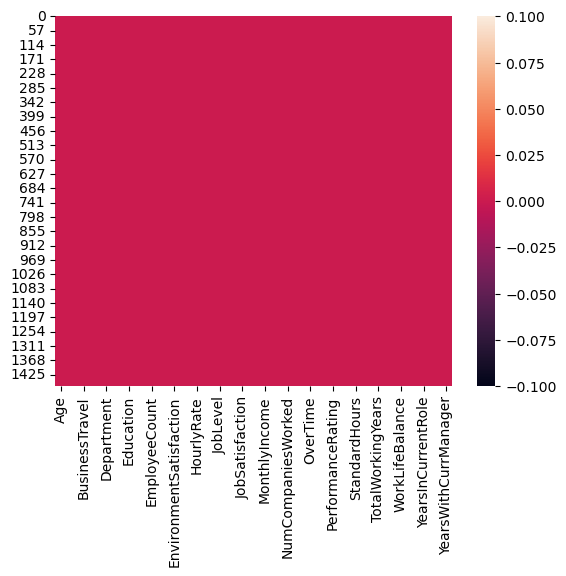

In [8]:
#heatmap to check the missing value
sns.heatmap(df.isnull())

In [9]:
df.duplicated().sum()

0

## Data Transformation

In [10]:
from sklearn.preprocessing import LabelEncoder 

In [11]:
lab_enc = LabelEncoder()  #storing LabelEncoder in lab_enc.
df2 = lab_enc.fit_transform(df['Attrition'])  #Storing type dataset into df2
df3 = lab_enc.fit_transform(df['BusinessTravel'])
df4 = lab_enc.fit_transform(df['Department']) 
df5 = lab_enc.fit_transform(df['Gender'])
df6 = lab_enc.fit_transform(df['JobRole'])
df7 = lab_enc.fit_transform(df['MaritalStatus'])
df8 = lab_enc.fit_transform(df['OverTime'])
df9 = lab_enc.fit_transform(df['EducationField'])
df10 = lab_enc.fit_transform(df['Over18'])

In [12]:
#Converting dataset
pd.Series(df2)

0       1
1       0
2       1
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      1
15      0
16      0
17      0
18      0
19      0
20      0
21      1
22      0
23      0
24      1
25      0
26      1
27      0
28      0
29      0
30      0
31      0
32      0
33      1
34      1
35      0
36      1
37      0
38      0
39      0
40      0
41      0
42      1
43      0
44      0
45      1
46      0
47      0
48      0
49      0
50      1
51      1
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      1
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      1
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


In [20]:
pd.Series(df3)

0       2
1       1
2       2
3       1
4       2
5       1
6       2
7       2
8       1
9       2
10      2
11      2
12      2
13      2
14      2
15      2
16      2
17      0
18      2
19      2
20      0
21      2
22      2
23      2
24      2
25      2
26      1
27      2
28      2
29      2
30      2
31      2
32      2
33      2
34      2
35      2
36      2
37      2
38      2
39      1
40      2
41      2
42      2
43      1
44      1
45      2
46      0
47      2
48      1
49      2
50      2
51      2
52      2
53      0
54      2
55      1
56      1
57      2
58      2
59      2
60      2
61      1
62      2
63      2
64      2
65      2
66      1
67      2
68      1
69      2
70      1
71      2
72      2
73      2
74      2
75      2
76      2
77      2
78      2
79      2
80      2
81      2
82      2
83      0
84      2
85      2
86      2
87      2
88      2
89      2
90      1
91      2
92      2
93      1
94      2
95      2
96      2
97      0
98      2
99      0


In [13]:
pd.Series(df4) 

0       2
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      2
19      1
20      1
21      2
22      1
23      1
24      1
25      1
26      1
27      2
28      1
29      2
30      1
31      1
32      1
33      2
34      1
35      1
36      2
37      2
38      1
39      2
40      1
41      1
42      1
43      2
44      1
45      1
46      2
47      1
48      2
49      1
50      1
51      1
52      2
53      1
54      2
55      1
56      2
57      1
58      1
59      1
60      1
61      1
62      1
63      2
64      1
65      1
66      1
67      1
68      1
69      1
70      2
71      1
72      1
73      1
74      1
75      1
76      2
77      1
78      1
79      0
80      1
81      1
82      2
83      1
84      1
85      1
86      2
87      1
88      1
89      2
90      1
91      2
92      2
93      1
94      2
95      1
96      2
97      2
98      2
99      1


In [14]:
pd.Series(df5) 

0       0
1       1
2       1
3       0
4       1
5       1
6       0
7       1
8       1
9       1
10      1
11      0
12      1
13      1
14      1
15      0
16      1
17      1
18      0
19      1
20      0
21      1
22      0
23      1
24      1
25      0
26      0
27      1
28      0
29      0
30      1
31      1
32      1
33      1
34      1
35      0
36      1
37      0
38      0
39      0
40      1
41      0
42      1
43      1
44      0
45      0
46      1
47      1
48      1
49      1
50      1
51      1
52      0
53      1
54      0
55      0
56      1
57      0
58      1
59      1
60      1
61      0
62      0
63      0
64      0
65      0
66      1
67      1
68      1
69      1
70      0
71      1
72      1
73      1
74      0
75      0
76      1
77      1
78      1
79      1
80      1
81      1
82      1
83      0
84      1
85      1
86      1
87      1
88      1
89      1
90      1
91      1
92      0
93      1
94      1
95      0
96      0
97      1
98      1
99      1


In [15]:
pd.Series(df6)

0       7
1       6
2       2
3       6
4       2
5       2
6       2
7       2
8       4
9       0
10      2
11      2
12      6
13      2
14      2
15      4
16      6
17      2
18      3
19      6
20      4
21      8
22      5
23      6
24      6
25      3
26      6
27      7
28      0
29      3
30      2
31      0
32      2
33      8
34      6
35      6
36      8
37      8
38      6
39      7
40      2
41      2
42      2
43      7
44      2
45      5
46      7
47      6
48      7
49      2
50      2
51      2
52      7
53      0
54      7
55      5
56      7
57      2
58      2
59      4
60      4
61      2
62      5
63      7
64      0
65      3
66      4
67      6
68      6
69      6
70      7
71      6
72      6
73      6
74      2
75      4
76      7
77      5
78      5
79      1
80      2
81      6
82      7
83      6
84      4
85      4
86      8
87      2
88      0
89      7
90      0
91      7
92      7
93      0
94      7
95      5
96      7
97      7
98      7
99      2


In [16]:
pd.Series(df7)

0       2
1       1
2       2
3       1
4       1
5       2
6       1
7       0
8       2
9       1
10      1
11      2
12      0
13      0
14      2
15      0
16      0
17      0
18      1
19      2
20      0
21      2
22      2
23      2
24      2
25      0
26      2
27      1
28      1
29      2
30      2
31      1
32      2
33      1
34      1
35      0
36      1
37      1
38      1
39      1
40      0
41      0
42      2
43      2
44      2
45      1
46      2
47      1
48      2
49      1
50      2
51      2
52      0
53      1
54      1
55      2
56      1
57      1
58      0
59      0
60      1
61      2
62      0
63      2
64      0
65      0
66      2
67      0
68      1
69      1
70      2
71      1
72      2
73      1
74      1
75      2
76      2
77      1
78      2
79      0
80      1
81      2
82      1
83      0
84      1
85      2
86      0
87      1
88      1
89      2
90      1
91      2
92      0
93      1
94      2
95      1
96      1
97      1
98      2
99      1


In [17]:
pd.Series(df8)

0       1
1       0
2       1
3       1
4       0
5       0
6       1
7       0
8       0
9       0
10      0
11      1
12      0
13      0
14      1
15      0
16      1
17      1
18      0
19      1
20      0
21      0
22      0
23      0
24      0
25      0
26      1
27      0
28      0
29      0
30      0
31      1
32      0
33      0
34      1
35      0
36      1
37      0
38      1
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      1
49      0
50      1
51      1
52      1
53      1
54      1
55      1
56      0
57      1
58      0
59      0
60      1
61      0
62      1
63      0
64      0
65      1
66      0
67      0
68      0
69      1
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      1
78      0
79      1
80      1
81      0
82      0
83      1
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      1
92      1
93      1
94      0
95      0
96      0
97      0
98      0
99      0


In [18]:
pd.Series(df9)

0       1
1       1
2       4
3       1
4       3
5       1
6       3
7       1
8       1
9       3
10      3
11      1
12      1
13      3
14      1
15      1
16      1
17      3
18      1
19      1
20      4
21      1
22      1
23      1
24      3
25      4
26      1
27      2
28      3
29      2
30      3
31      4
32      3
33      5
34      3
35      3
36      2
37      2
38      1
39      1
40      4
41      1
42      1
43      1
44      3
45      5
46      2
47      1
48      2
49      1
50      1
51      5
52      2
53      3
54      2
55      1
56      1
57      3
58      1
59      1
60      3
61      1
62      3
63      1
64      5
65      3
66      1
67      1
68      3
69      3
70      1
71      1
72      3
73      1
74      1
75      1
76      2
77      4
78      3
79      3
80      1
81      3
82      1
83      3
84      3
85      1
86      5
87      1
88      1
89      3
90      1
91      2
92      3
93      3
94      3
95      5
96      4
97      3
98      3
99      3


In [19]:
pd.Series(df10)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


In [21]:
df['Attrition']=df2  #storing dataset in df2
df['BusinessTravel']=df3
df['Department']=df4
df['Gender']=df5
df['JobRole']=df6
df['MaritalStatus']=df7
df['OverTime']=df8
df['EducationField']=df9
df['Over18']=df10

In [22]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [23]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

There are 1233 datasets with a label of 0 (NO) and 237 datasets with a label of 1 (YES)

In [24]:
data = df['Attrition'].value_counts()

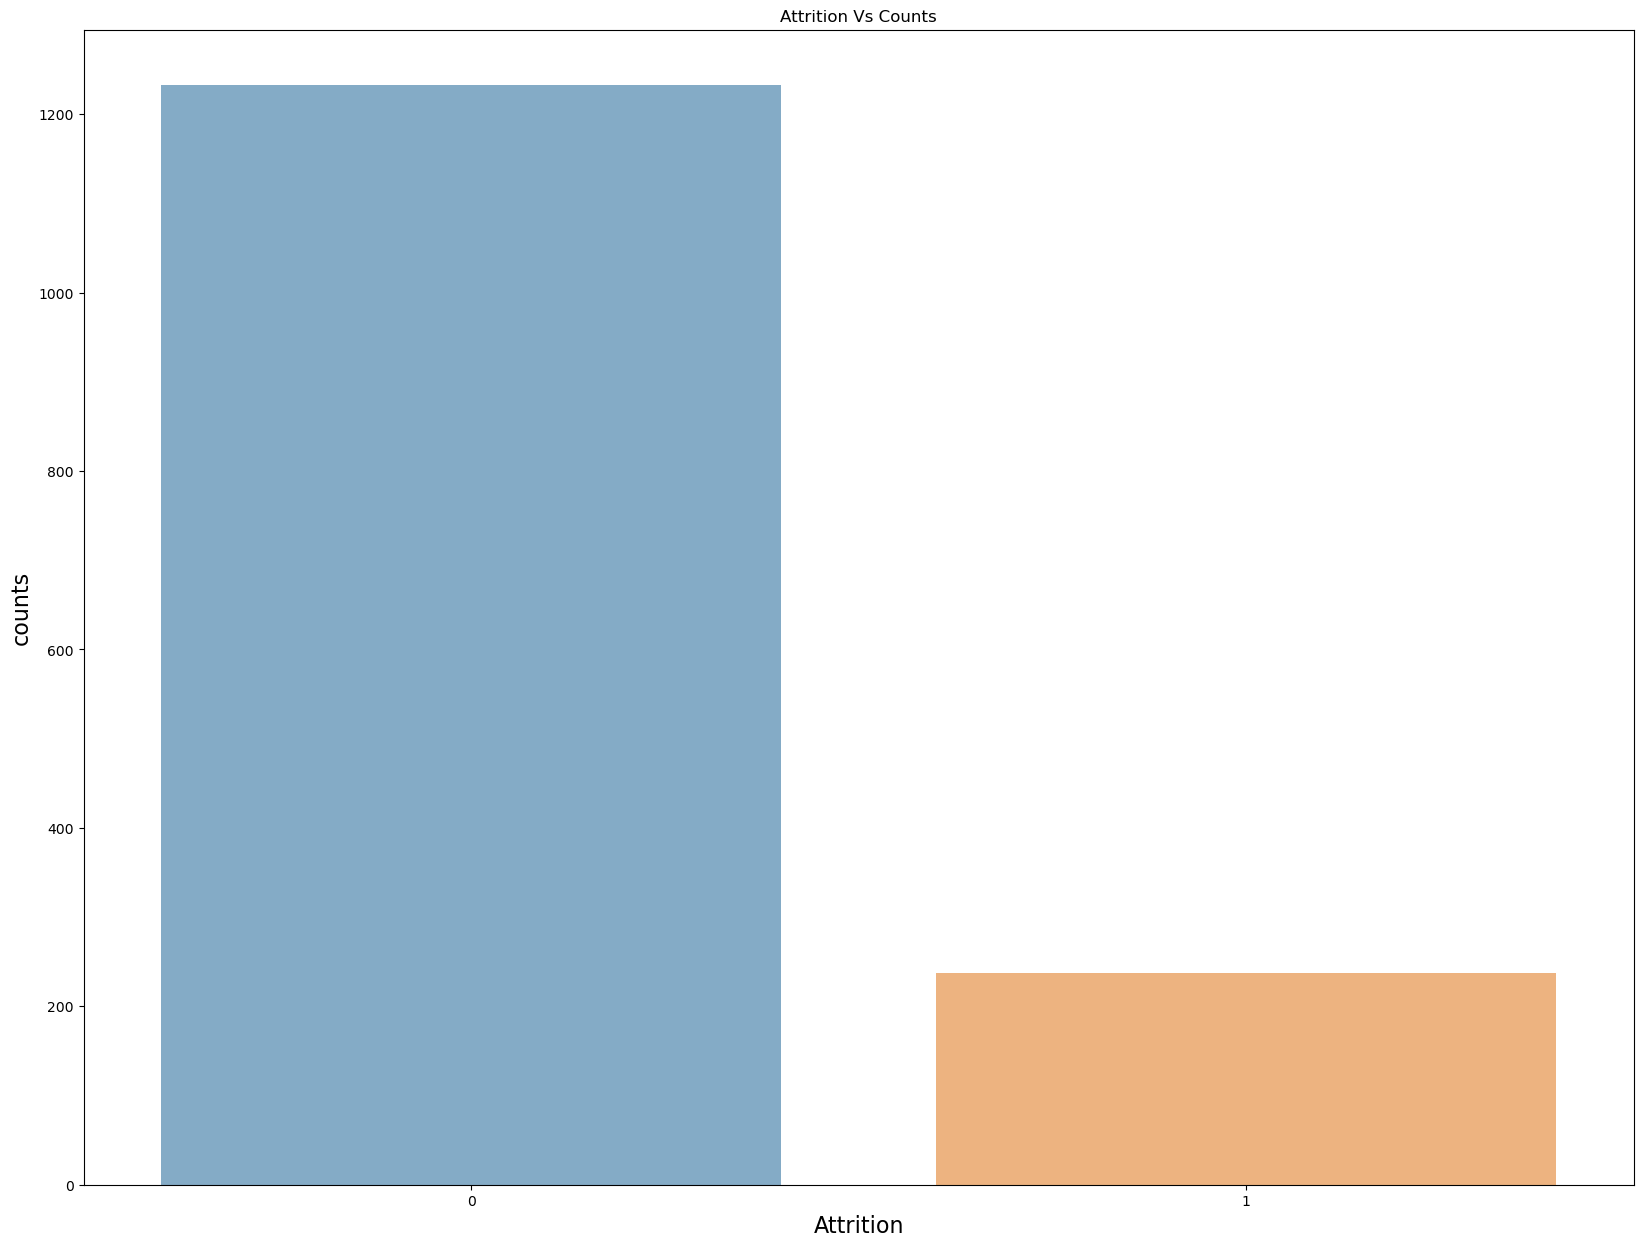

In [26]:
plt.figure(figsize=(20,15))
sns.barplot(x=data.index, y=data.values, alpha=0.6)
plt.xlabel('Attrition', fontsize=16)
plt.ylabel('counts', fontsize=16)
plt.title('Attrition Vs Counts')
plt.show()

## Data description

In [27]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


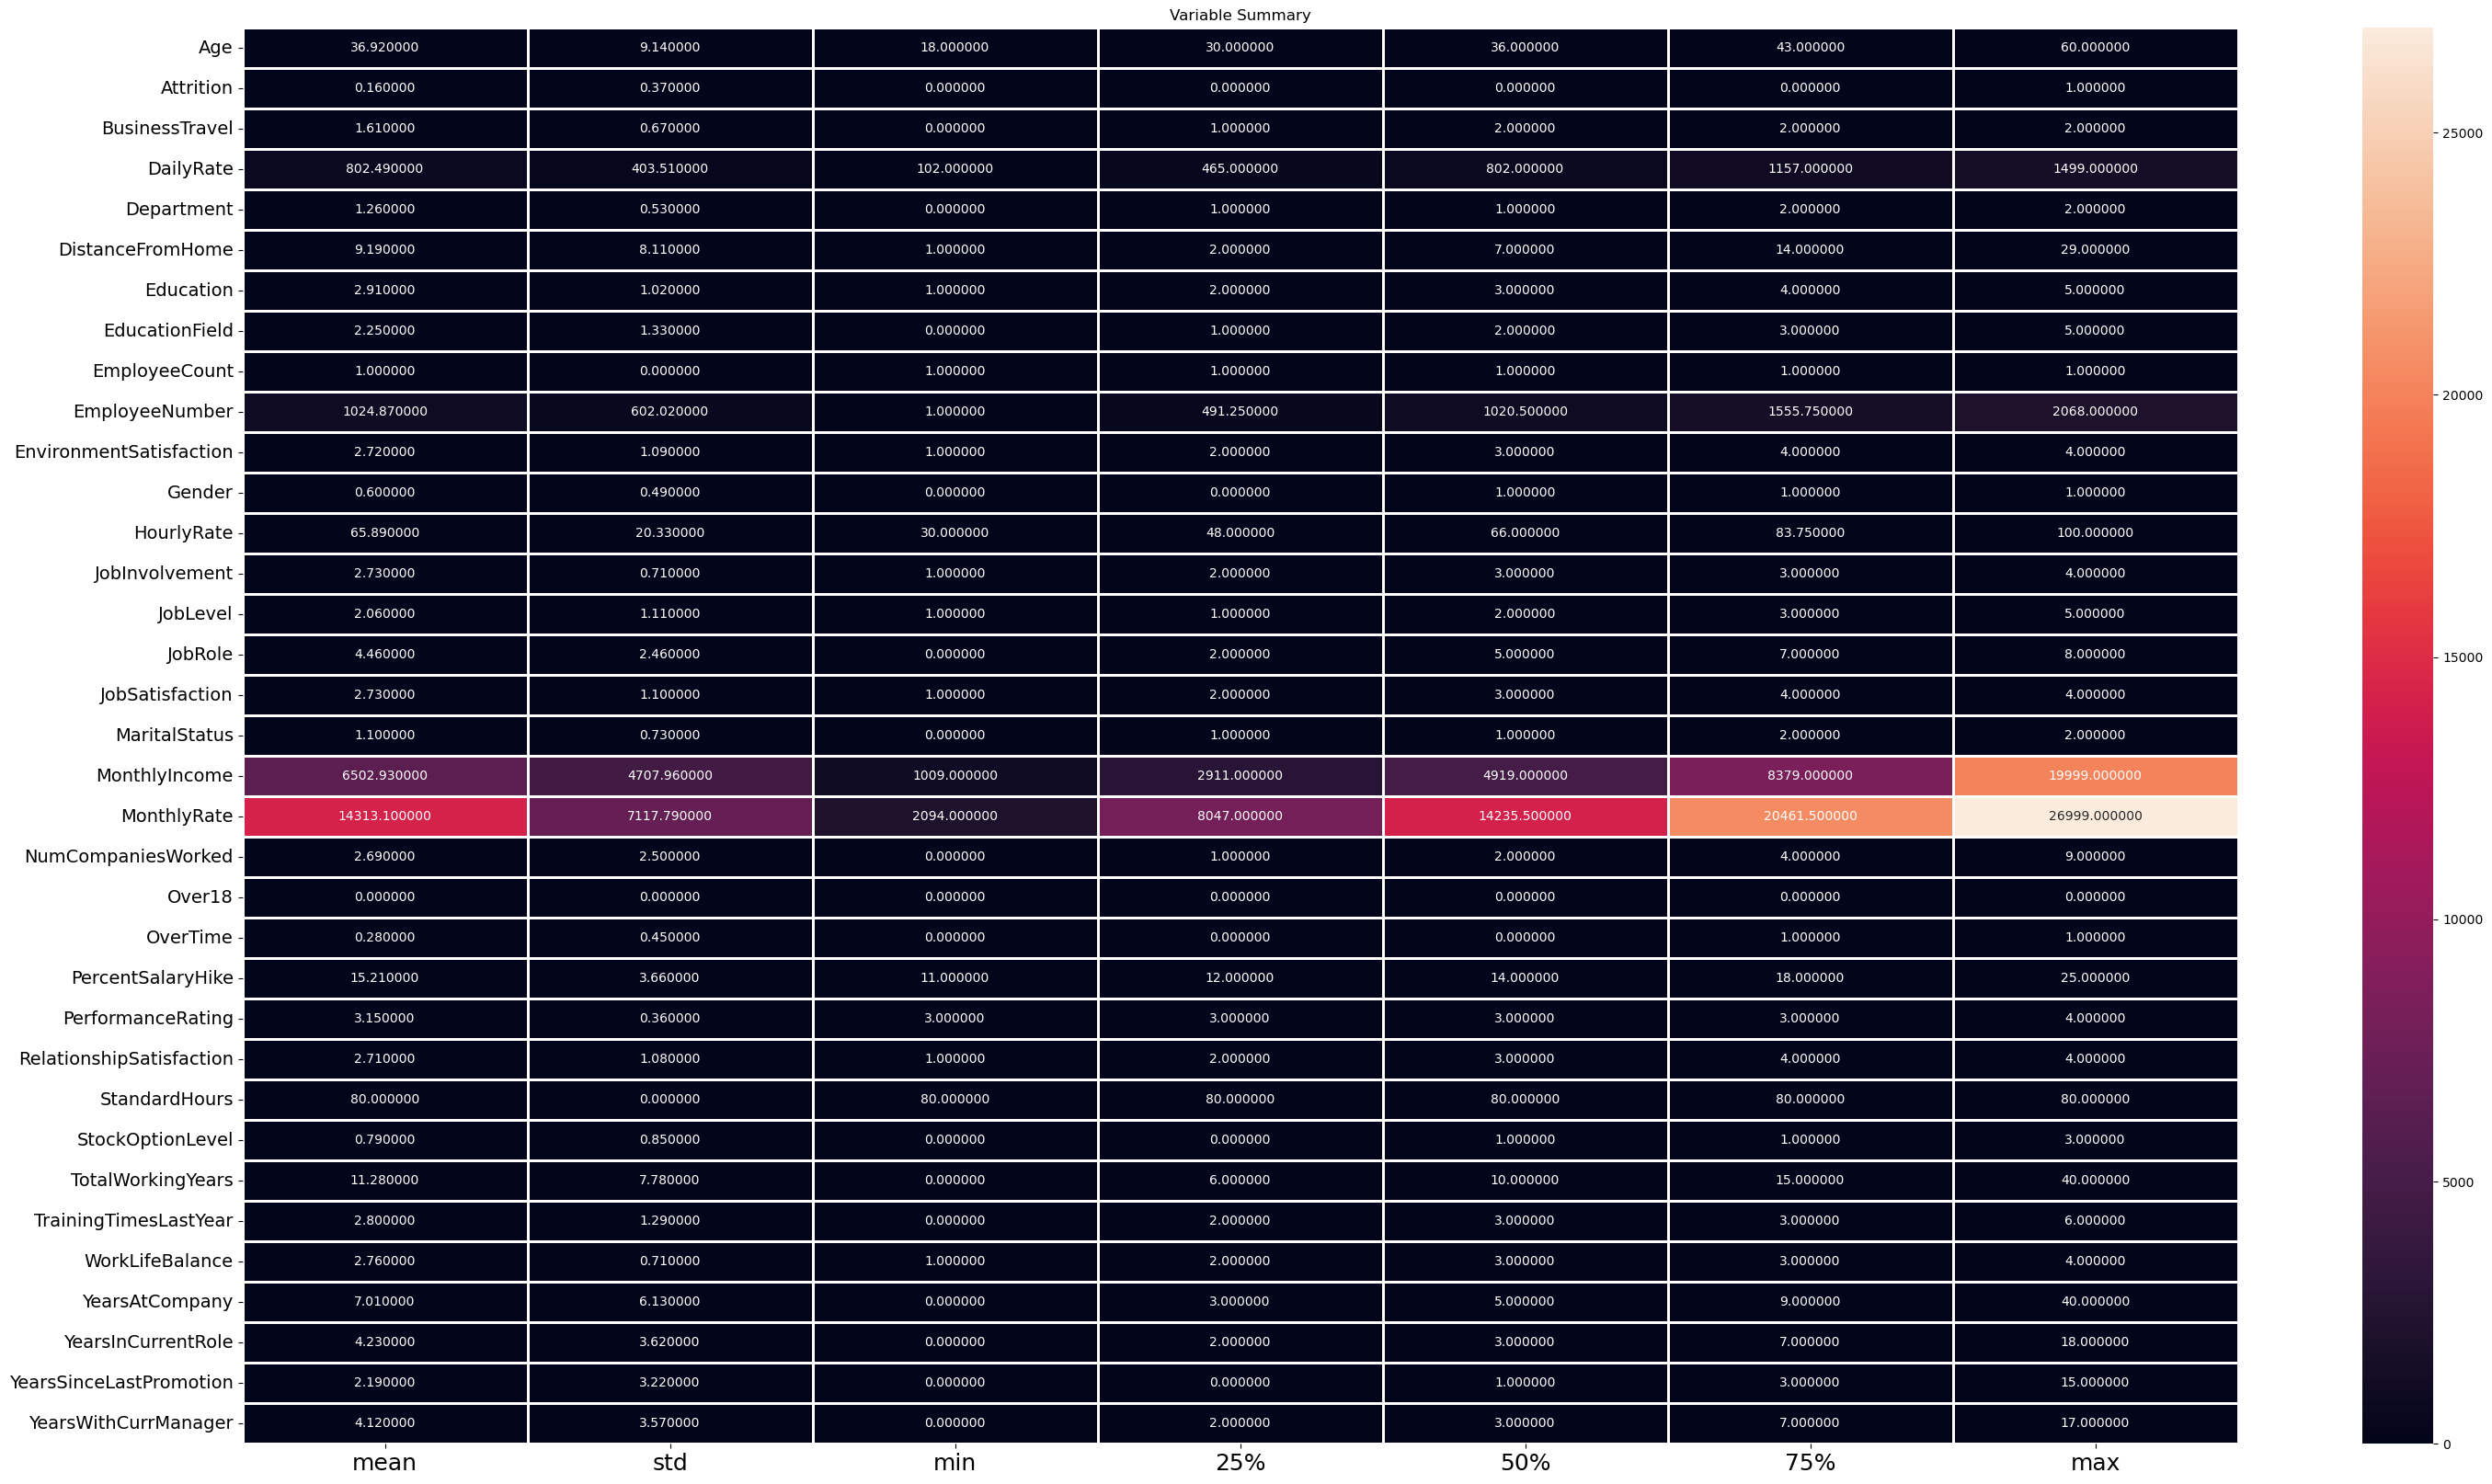

In [28]:
plt.figure(figsize=(35,20))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
plt.title("Variable Summary")
plt.show()

In [29]:
corr_mat = df.corr()

In [30]:
corr_mat

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


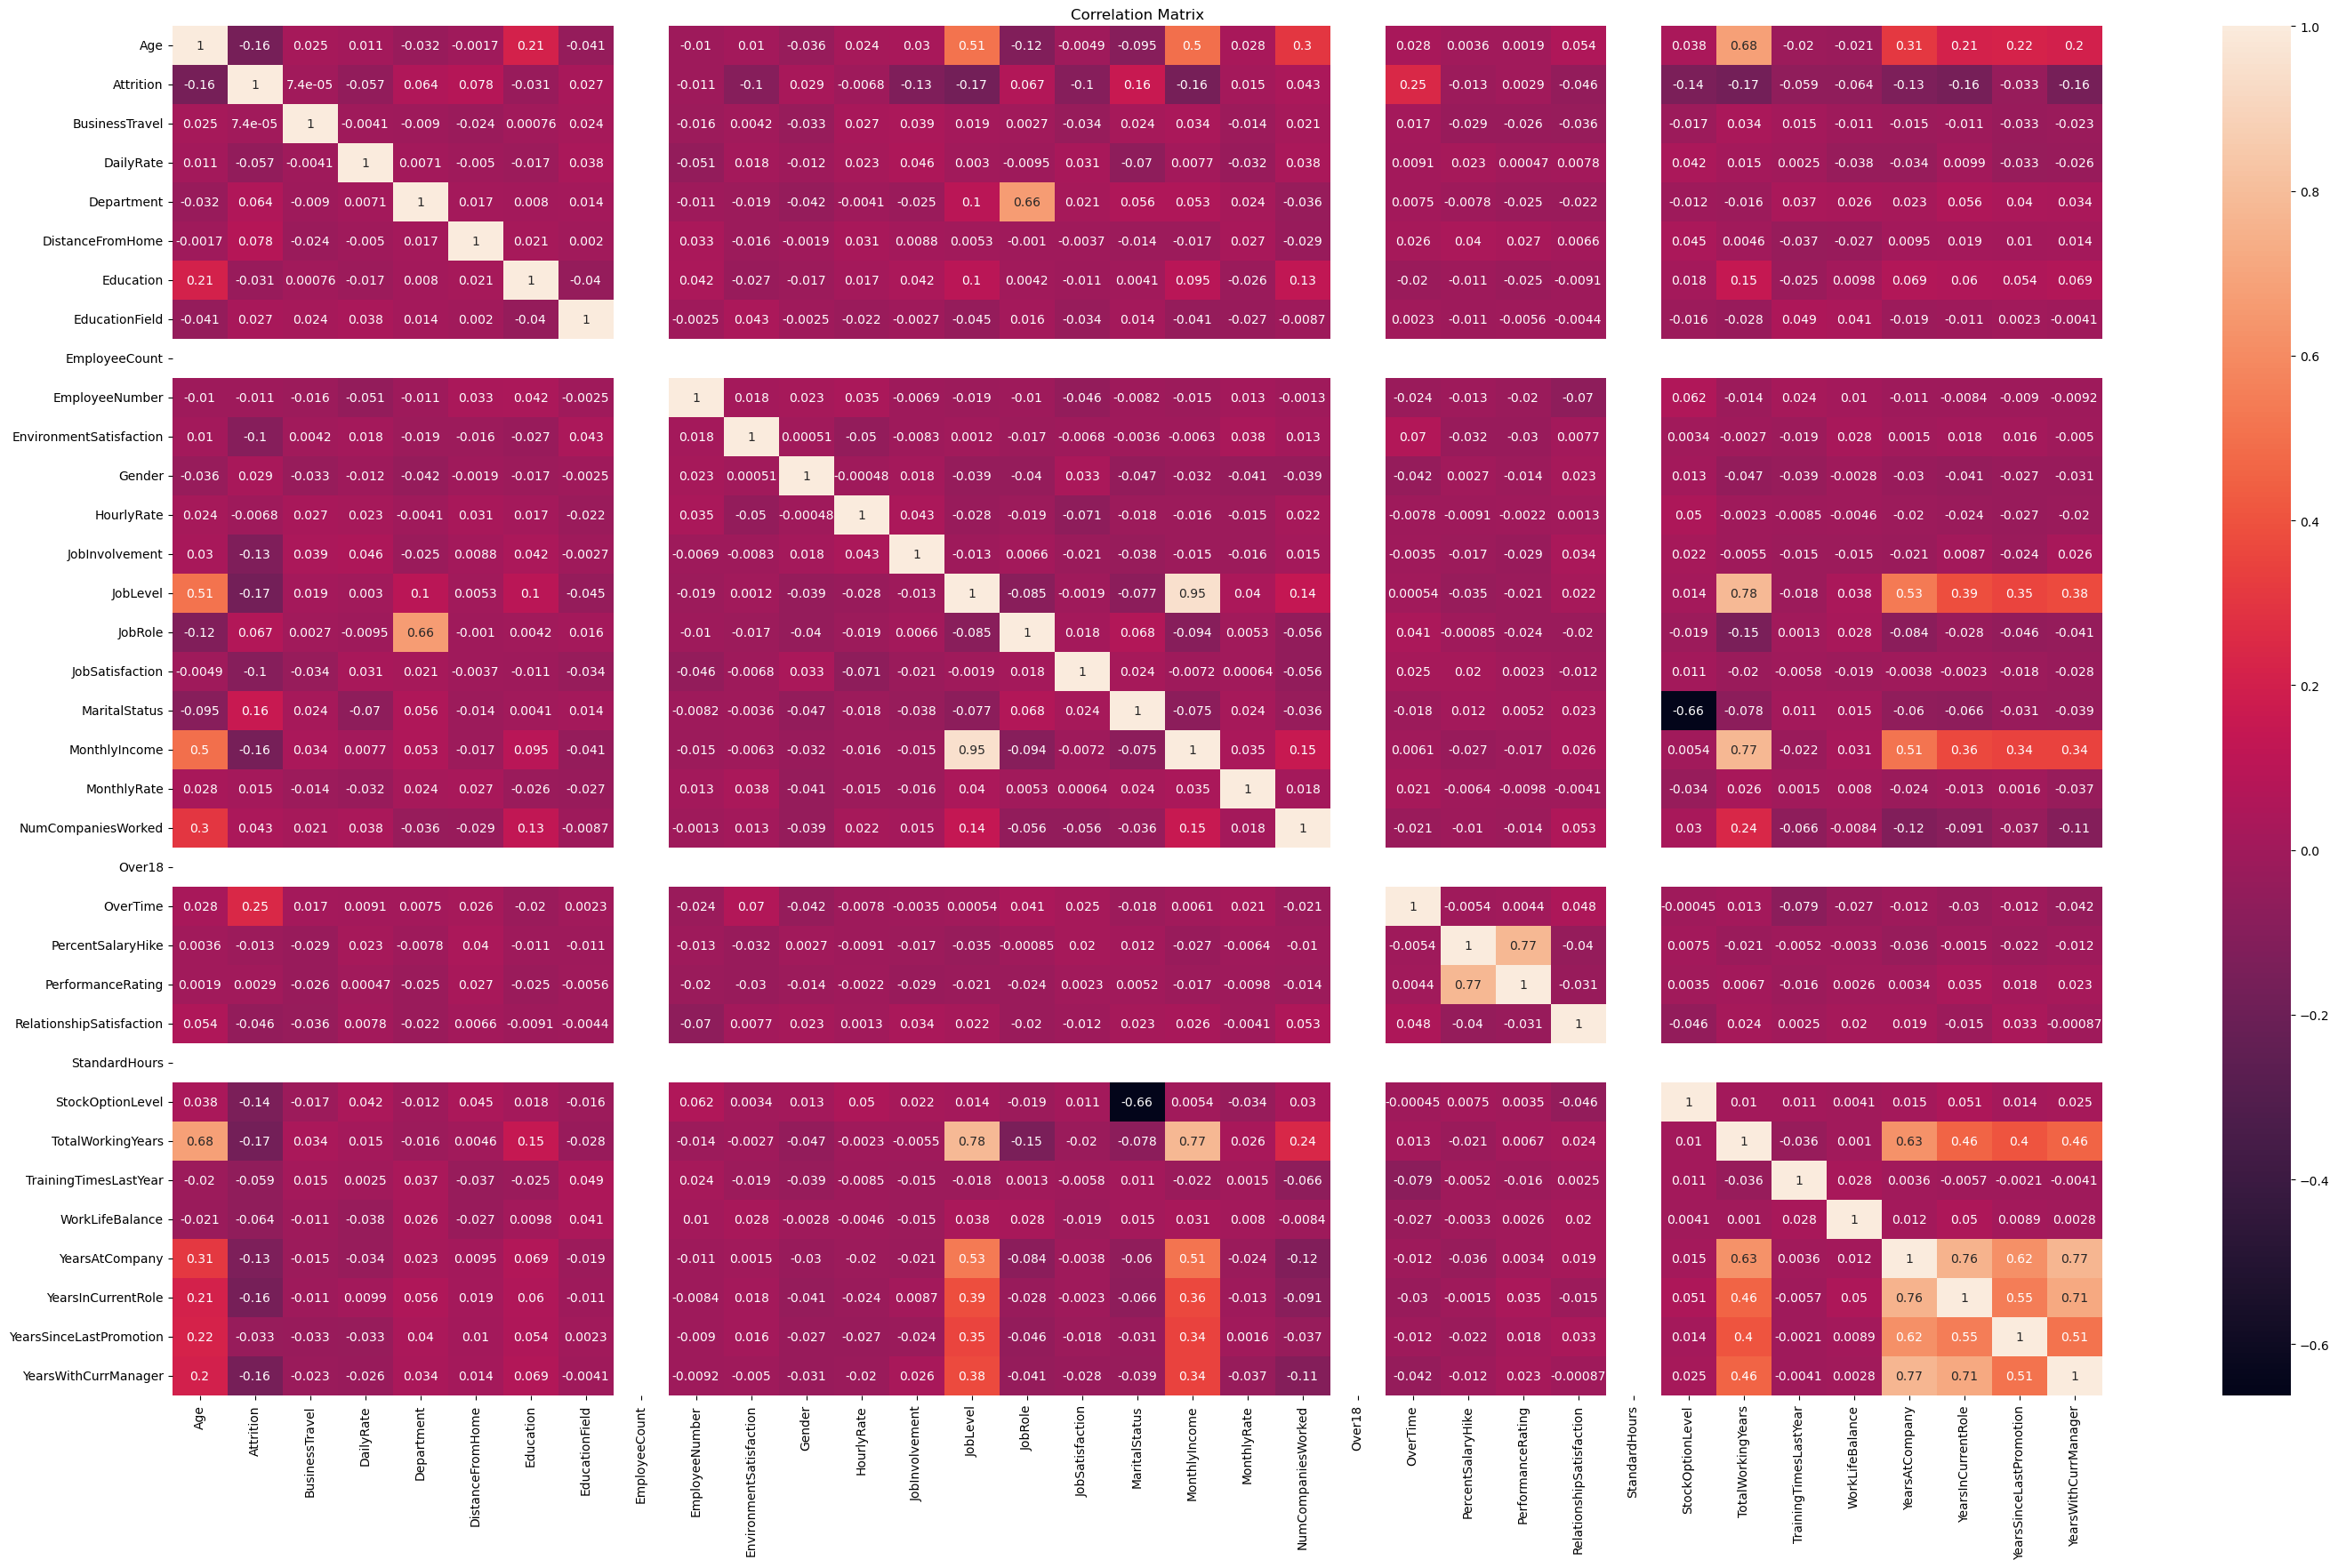

In [31]:
plt.figure(figsize=(35,20))
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

## Data standarization and normalization

Age                            Axes(0.125,0.798085;0.110714x0.0819149)
Attrition                   Axes(0.257857,0.798085;0.110714x0.0819149)
BusinessTravel              Axes(0.390714,0.798085;0.110714x0.0819149)
DailyRate                   Axes(0.523571,0.798085;0.110714x0.0819149)
Department                  Axes(0.656429,0.798085;0.110714x0.0819149)
DistanceFromHome            Axes(0.789286,0.798085;0.110714x0.0819149)
Education                      Axes(0.125,0.699787;0.110714x0.0819149)
EducationField              Axes(0.257857,0.699787;0.110714x0.0819149)
EmployeeCount               Axes(0.390714,0.699787;0.110714x0.0819149)
EmployeeNumber              Axes(0.523571,0.699787;0.110714x0.0819149)
EnvironmentSatisfaction     Axes(0.656429,0.699787;0.110714x0.0819149)
Gender                      Axes(0.789286,0.699787;0.110714x0.0819149)
HourlyRate                     Axes(0.125,0.601489;0.110714x0.0819149)
JobInvolvement              Axes(0.257857,0.601489;0.110714x0.0819149)
JobLev

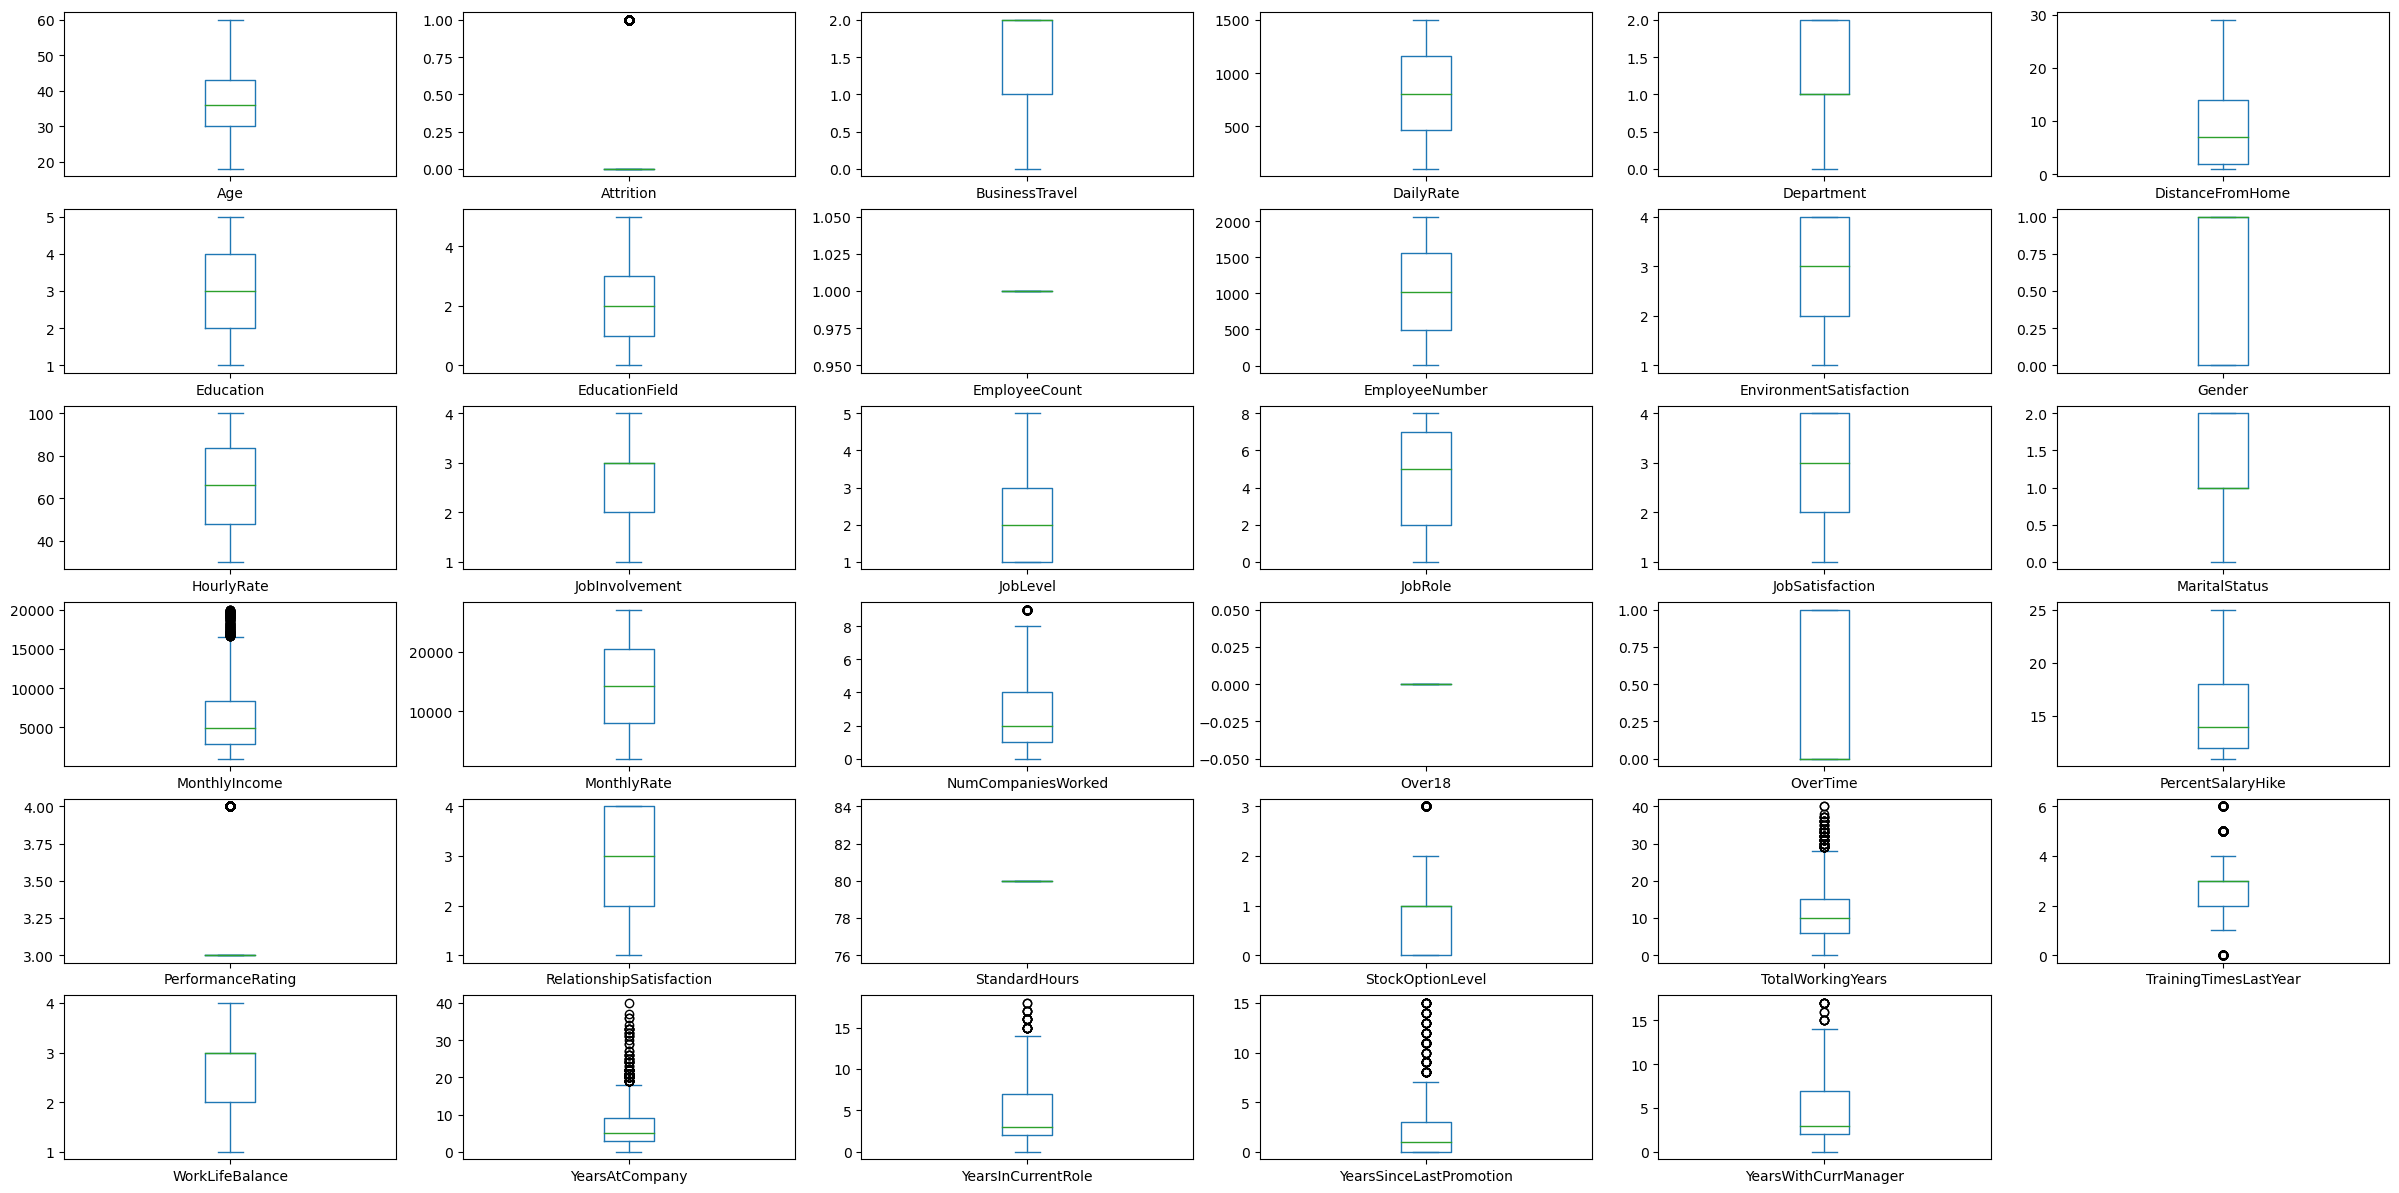

In [32]:
df.plot(kind='box',subplots =True, layout=(8,6),figsize=(30,20))

In [33]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

Let's visualize the skewness with the help of a distplot.

<Axes: xlabel='Age', ylabel='Density'>

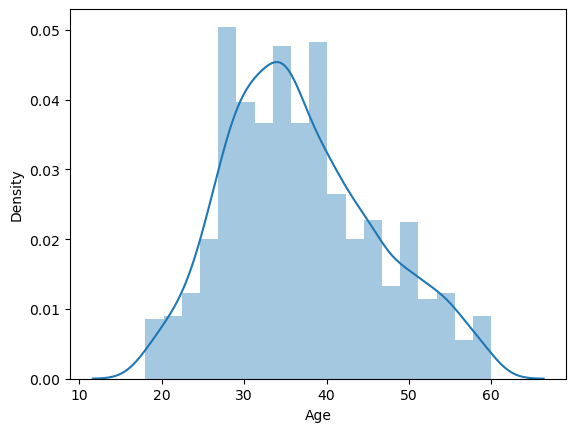

In [34]:
sns.distplot(df['Age'])

<Axes: xlabel='Attrition', ylabel='Density'>

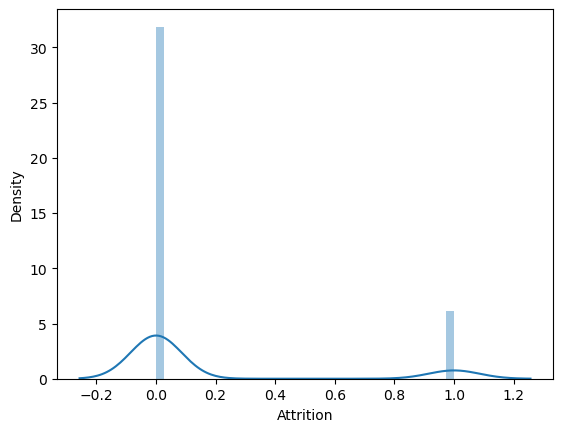

In [35]:
sns.distplot(df['Attrition'])

<Axes: xlabel='BusinessTravel', ylabel='Density'>

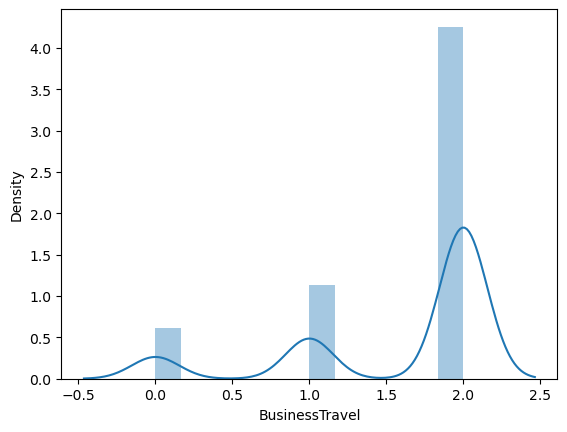

In [36]:
sns.distplot(df['BusinessTravel'])

<Axes: xlabel='DailyRate', ylabel='Density'>

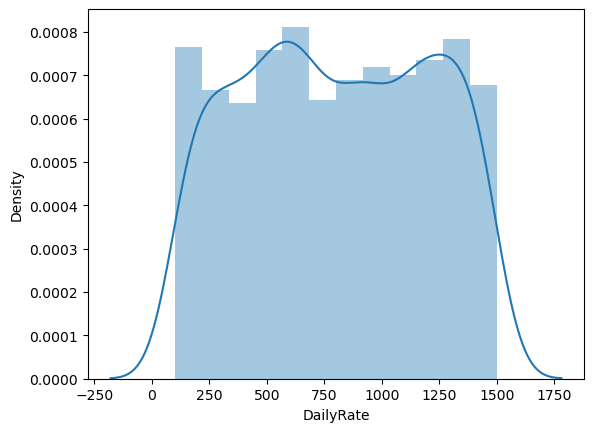

In [37]:
sns.distplot(df['DailyRate'])

<Axes: xlabel='Department', ylabel='Density'>

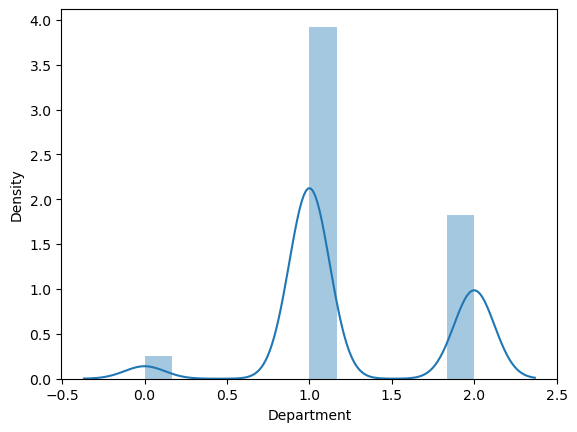

In [38]:
sns.distplot(df['Department'])

<Axes: xlabel='DistanceFromHome', ylabel='Density'>

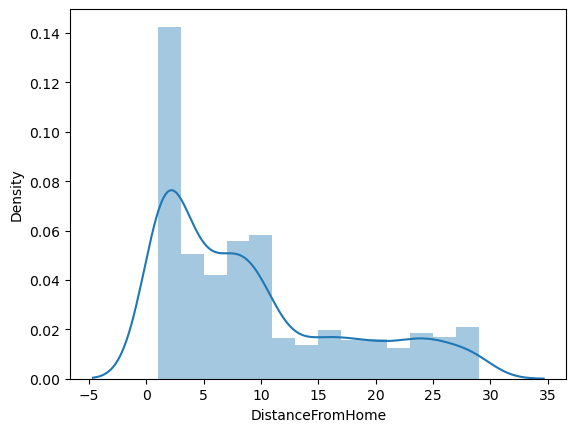

In [39]:
sns.distplot(df['DistanceFromHome'])

<Axes: xlabel='Education', ylabel='Density'>

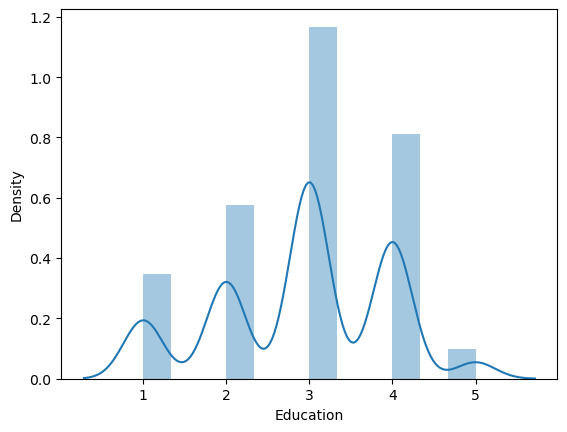

In [40]:
sns.distplot(df['Education'])

<Axes: xlabel='EducationField', ylabel='Density'>

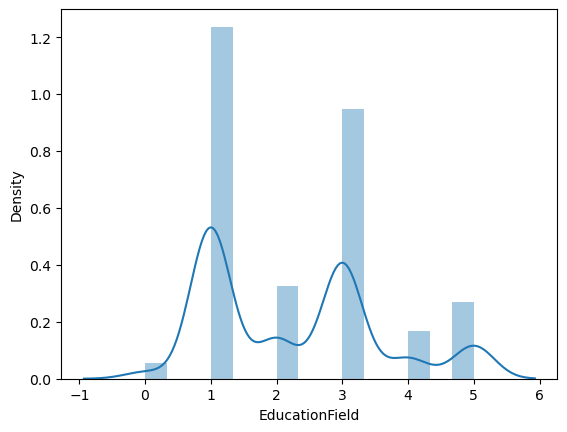

In [41]:
sns.distplot(df['EducationField'])

<Axes: xlabel='EmployeeCount', ylabel='Density'>

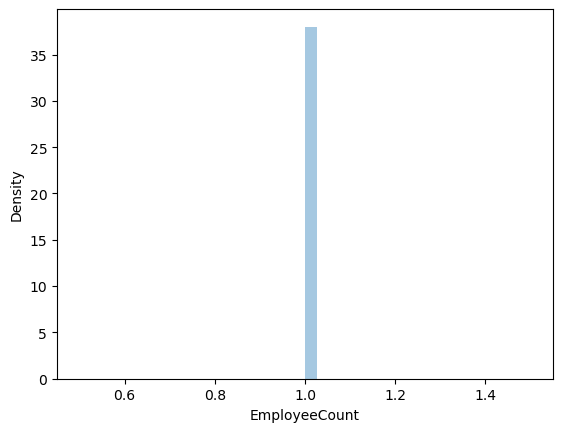

In [42]:
sns.distplot(df['EmployeeCount'])

<Axes: xlabel='EmployeeNumber', ylabel='Density'>

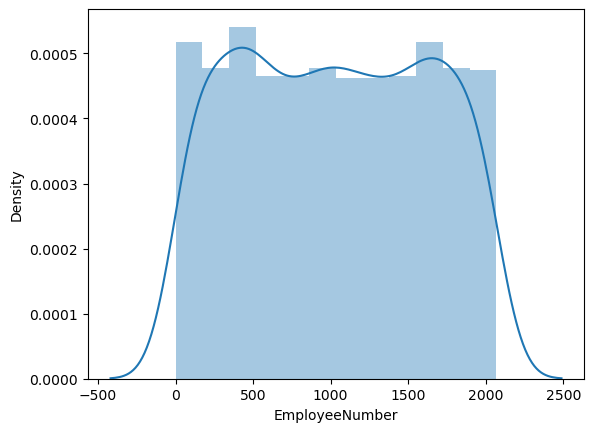

In [43]:
sns.distplot(df['EmployeeNumber'])

<Axes: xlabel='EnvironmentSatisfaction', ylabel='Density'>

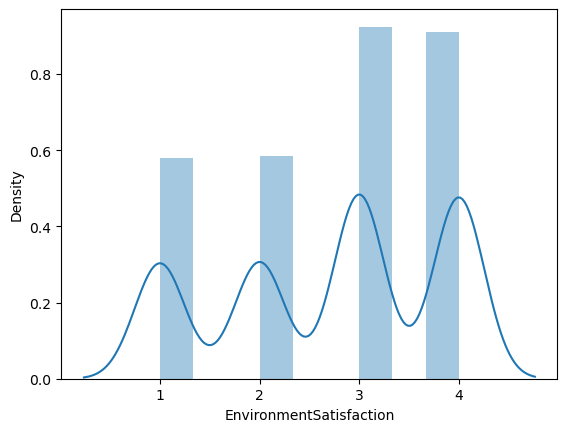

In [44]:
sns.distplot(df['EnvironmentSatisfaction'])

<Axes: xlabel='Gender', ylabel='Density'>

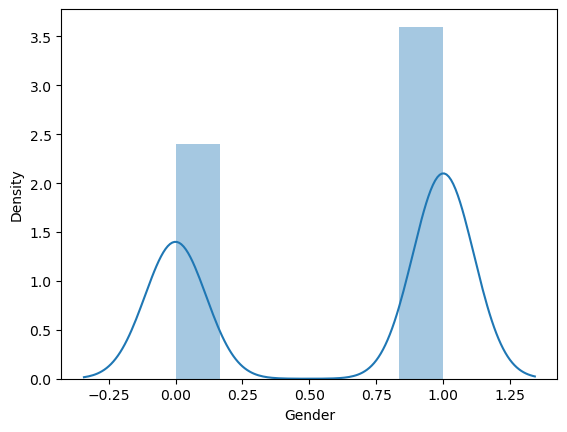

In [45]:
sns.distplot(df['Gender'])

<Axes: xlabel='HourlyRate', ylabel='Density'>

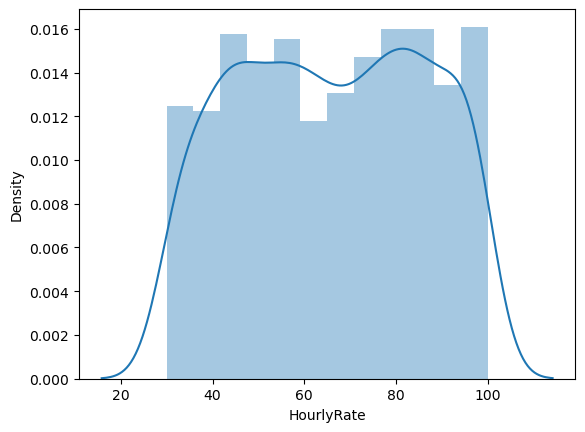

In [46]:
sns.distplot(df['HourlyRate'])

<Axes: xlabel='JobInvolvement', ylabel='Density'>

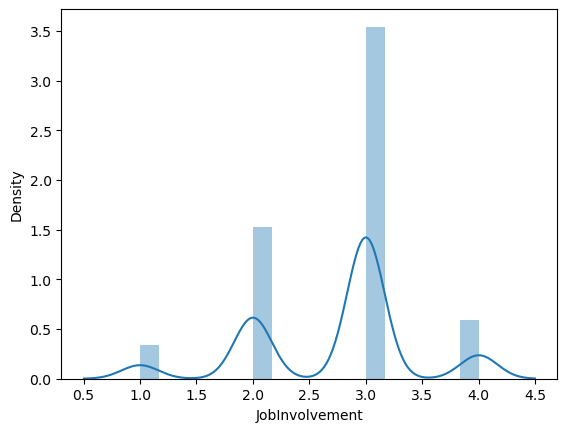

In [47]:
sns.distplot(df['JobInvolvement'])

<Axes: xlabel='JobLevel', ylabel='Density'>

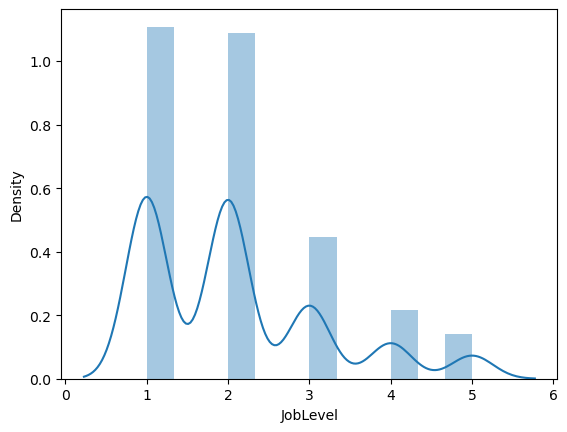

In [48]:
sns.distplot(df['JobLevel'])

<Axes: xlabel='JobRole', ylabel='Density'>

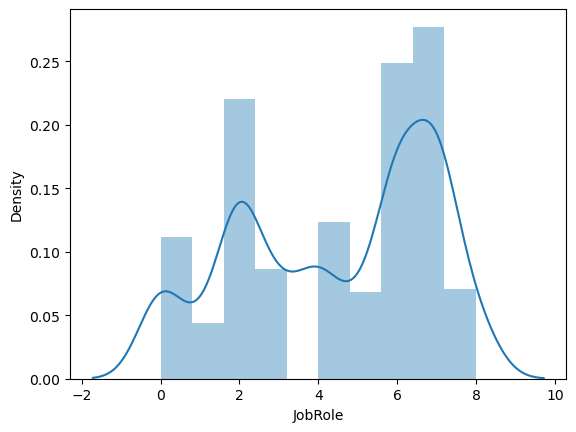

In [49]:
sns.distplot(df['JobRole'])

<Axes: xlabel='JobSatisfaction', ylabel='Density'>

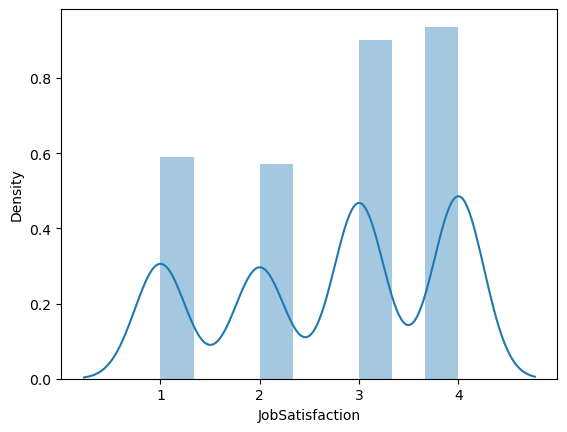

In [50]:
sns.distplot(df['JobSatisfaction'])

<Axes: xlabel='MaritalStatus', ylabel='Density'>

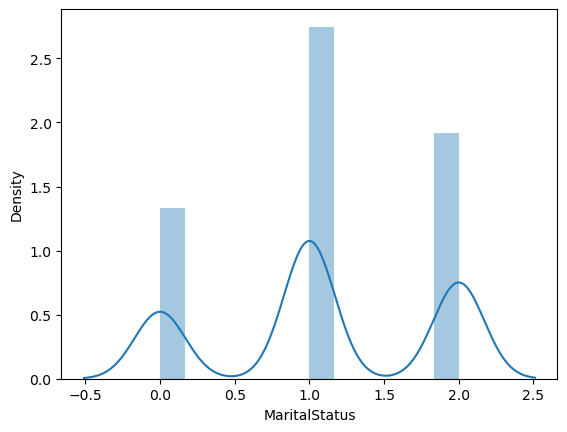

In [51]:
sns.distplot(df['MaritalStatus'])

<Axes: xlabel='MonthlyIncome', ylabel='Density'>

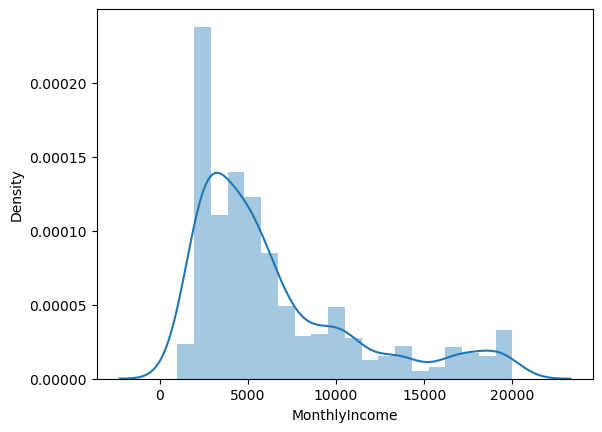

In [52]:
sns.distplot(df['MonthlyIncome'])

<Axes: xlabel='MonthlyRate', ylabel='Density'>

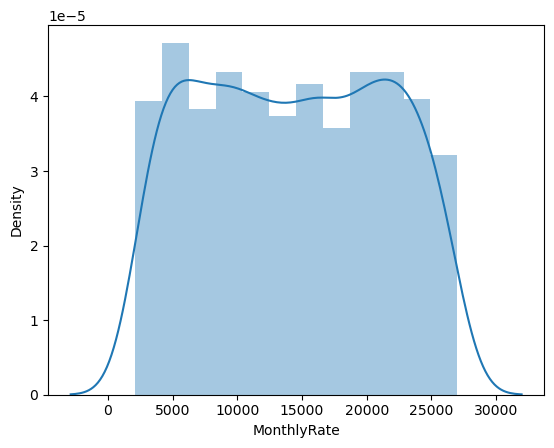

In [53]:
sns.distplot(df['MonthlyRate'])

<Axes: xlabel='NumCompaniesWorked', ylabel='Density'>

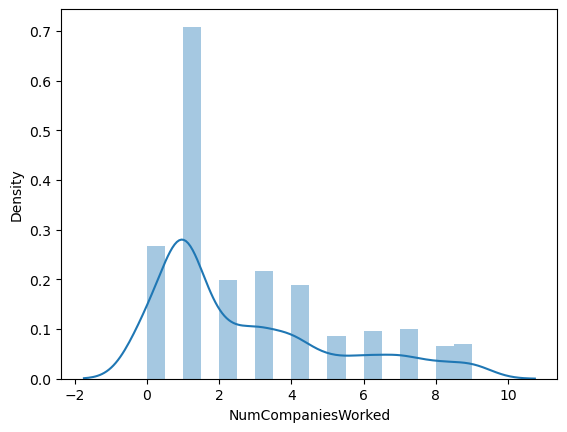

In [54]:
sns.distplot(df['NumCompaniesWorked'])

<Axes: xlabel='Over18', ylabel='Density'>

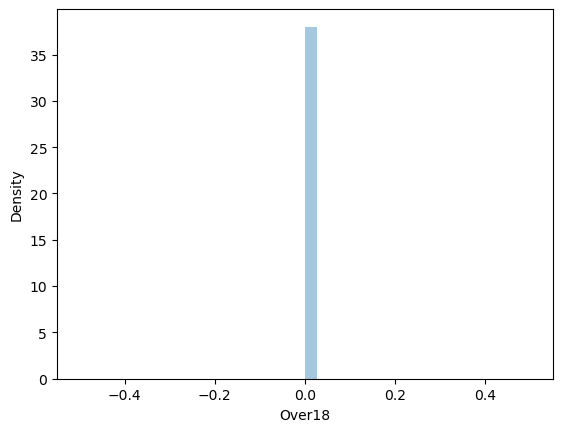

In [55]:
sns.distplot(df['Over18'])

<Axes: xlabel='OverTime', ylabel='Density'>

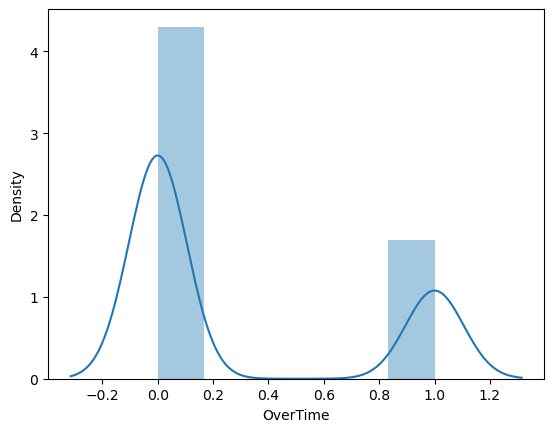

In [56]:
sns.distplot(df['OverTime'])

<Axes: xlabel='PercentSalaryHike', ylabel='Density'>

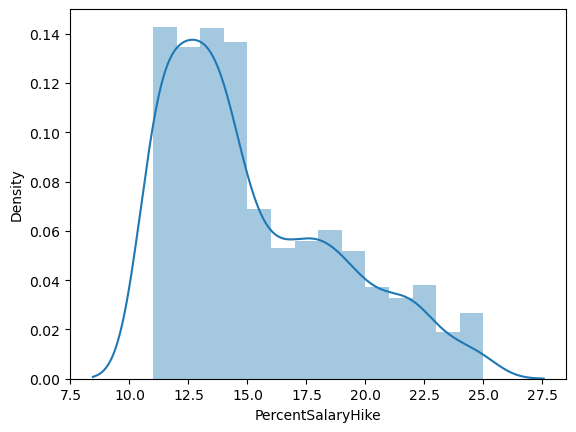

In [57]:
sns.distplot(df['PercentSalaryHike'])

<Axes: xlabel='PerformanceRating', ylabel='Density'>

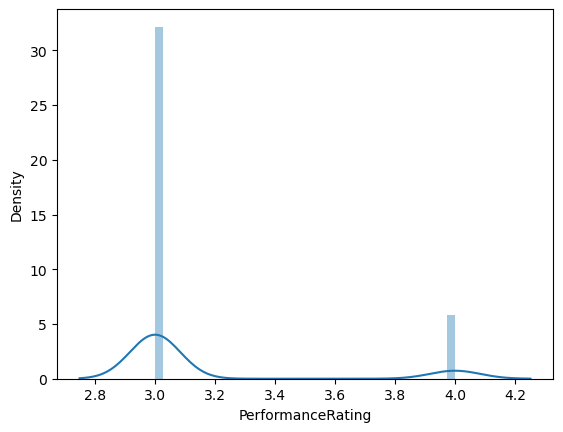

In [58]:
sns.distplot(df['PerformanceRating'])

<Axes: xlabel='RelationshipSatisfaction', ylabel='Density'>

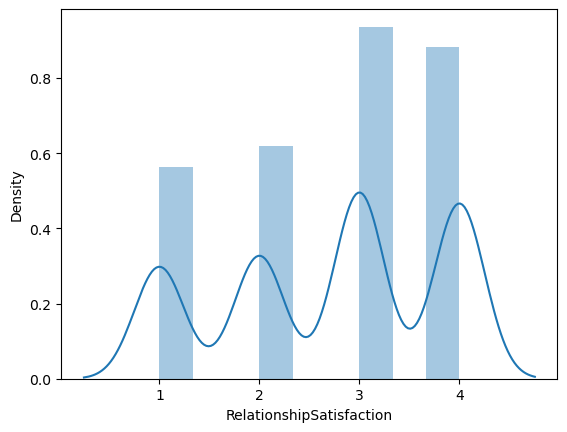

In [59]:
sns.distplot(df['RelationshipSatisfaction'])

<Axes: xlabel='StandardHours', ylabel='Density'>

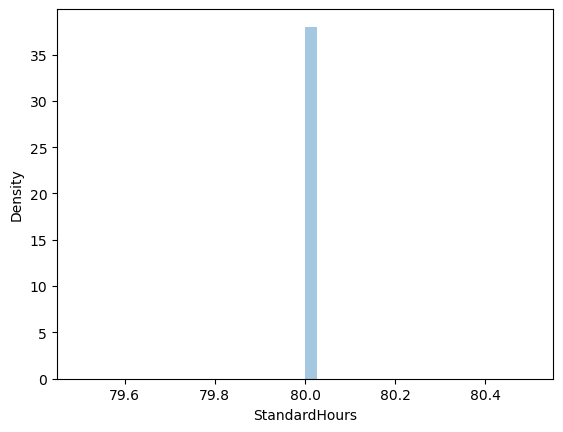

In [60]:
sns.distplot(df['StandardHours'])

<Axes: xlabel='StockOptionLevel', ylabel='Density'>

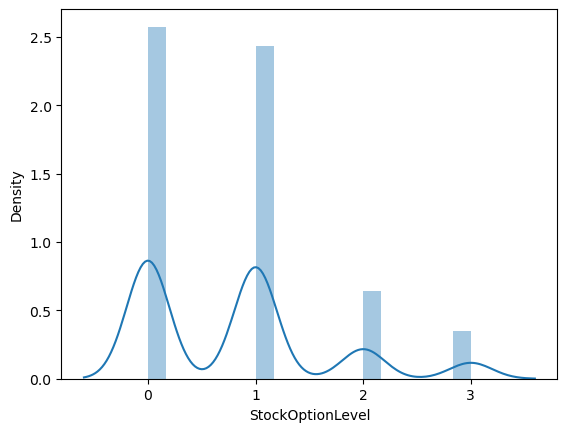

In [61]:
sns.distplot(df['StockOptionLevel'])

<Axes: xlabel='TotalWorkingYears', ylabel='Density'>

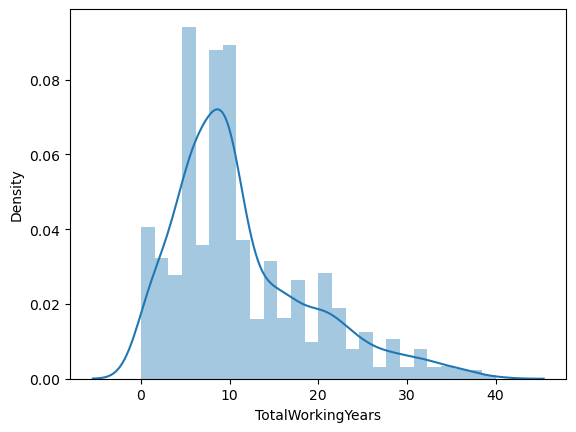

In [62]:
sns.distplot(df['TotalWorkingYears'])

<Axes: xlabel='TrainingTimesLastYear', ylabel='Density'>

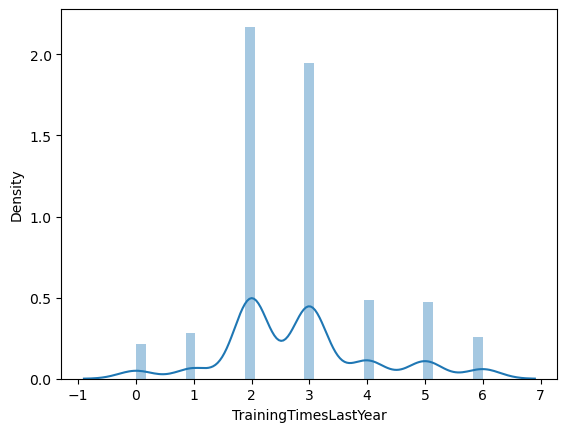

In [63]:
sns.distplot(df['TrainingTimesLastYear'])

<Axes: xlabel='WorkLifeBalance', ylabel='Density'>

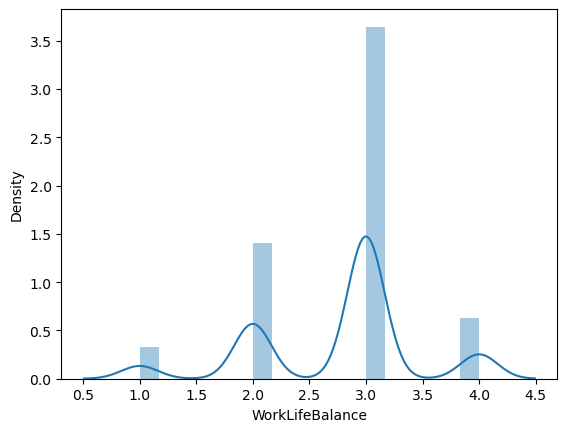

In [64]:
sns.distplot(df['WorkLifeBalance'])

<Axes: xlabel='YearsAtCompany', ylabel='Density'>

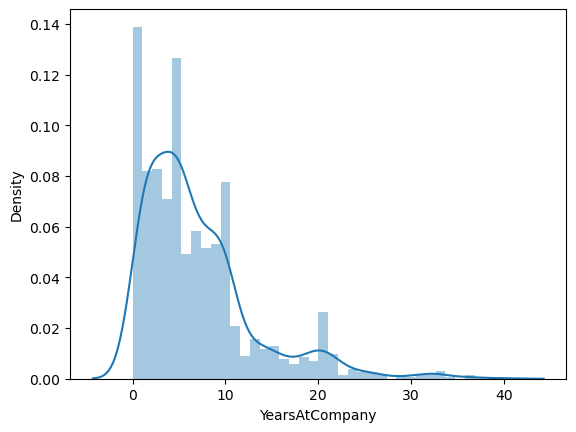

In [65]:
sns.distplot(df['YearsAtCompany'])

<Axes: xlabel='YearsInCurrentRole', ylabel='Density'>

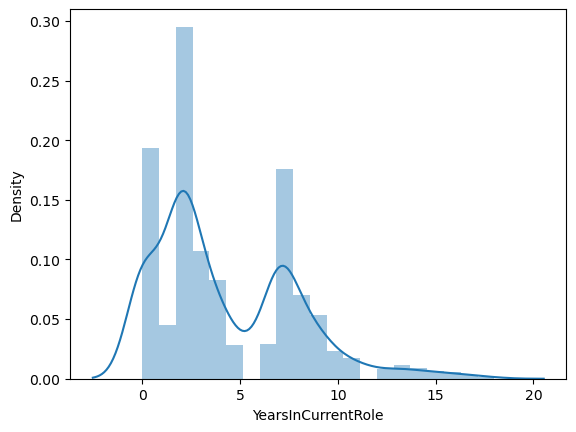

In [66]:
sns.distplot(df['YearsInCurrentRole'])

<Axes: xlabel='YearsSinceLastPromotion', ylabel='Density'>

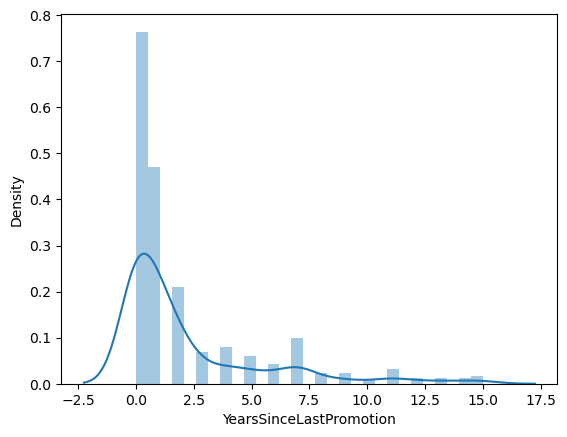

In [67]:
sns.distplot(df['YearsSinceLastPromotion'])

<Axes: xlabel='YearsWithCurrManager', ylabel='Density'>

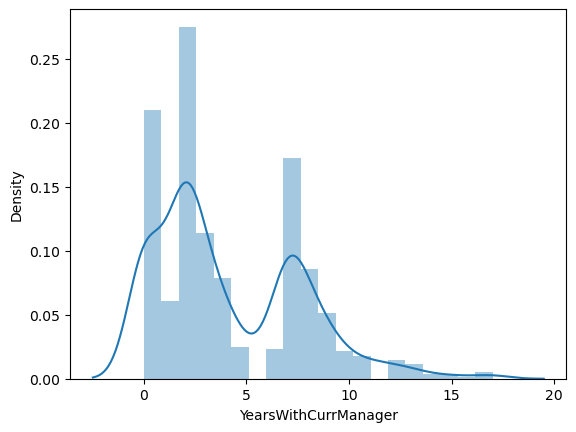

In [68]:
sns.distplot(df['YearsWithCurrManager'])

#### Removing skewness from the dataset with the help of Z-score.

In [69]:
from scipy.stats import zscore 
from scipy import stats

In [70]:
z = np.abs(stats.zscore(df))
z.shape

(1470, 35)

In [71]:
index = (np.where(z>5)[0])
df = df.drop(df.index[index])
df.shape

(1469, 35)

In [72]:
loss_percent=(1470-1469)/1470*100
print(loss_percent)

0.06802721088435373


After removing skewness, the total data loss is 0.068%.

### Creating train and test datasets using optimal parameters.

In [73]:
#split dataset into x and y
y = df['Attrition']
x = df.drop(columns=['Attrition'])

In [74]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [75]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [76]:
# Data Scaling
#StandardScaler = (X-mean)/std
from sklearn.preprocessing import StandardScaler   

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled 

array([[ 0.44858306,  0.59031909,  0.74183516, ..., -0.06224393,
        -0.67987863,  0.24613163],
       [ 1.32589178, -0.91259035, -1.29960755, ...,  0.76648418,
        -0.36786935,  0.80670119],
       [ 0.0099287 ,  0.59031909,  1.41404777, ..., -1.16721475,
        -0.67987863, -1.15529227],
       ...,
       [-1.0867072 ,  0.59031909, -1.60718823, ..., -0.61472934,
        -0.67987863, -0.31443793],
       [ 1.32589178, -0.91259035,  0.54587651, ...,  0.49024148,
        -0.67987863,  1.08698598],
       [-0.31906207,  0.59031909, -0.43391678, ..., -0.33848664,
        -0.36786935, -0.59472271]])

In [77]:
#Splitting Dataset into training and testing data using train_test_split 

from sklearn.model_selection import train_test_split  #importing requried lib.

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=340)
y_train

1041    0
181     0
880     0
1078    0
1395    1
393     0
1031    1
886     0
502     0
305     0
1389    0
265     0
354     0
860     1
857     1
1431    0
576     0
293     1
159     0
98      0
1336    0
1427    0
906     0
151     0
656     1
307     0
812     0
147     0
1406    0
1161    0
771     0
578     0
582     0
1370    0
738     0
1074    0
194     0
728     0
1250    0
404     0
1411    0
270     0
418     0
751     0
631     0
391     0
1014    0
364     0
37      0
358     0
353     0
1415    0
1269    0
175     0
163     0
670     0
639     0
174     0
389     0
815     0
1203    0
251     0
548     0
158     0
344     0
1369    1
137     0
854     0
718     0
198     0
1090    0
337     0
1025    0
1388    0
1194    0
1265    0
1016    1
407     0
985     1
13      0
429     0
346     0
254     0
272     0
1133    0
1099    0
260     0
312     0
608     1
620     0
286     1
870     0
392     0
624     0
1465    0
227     0
1277    0
257     0
1180    0
654     0


### Model training

In [78]:
from sklearn.linear_model import LogisticRegression #Importing required lib.
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)

print(accuracy_score(y_test,predlr))

print(confusion_matrix(y_test,predlr))

print(classification_report(y_test,predlr))

0.8559782608695652
[[286  14]
 [ 39  29]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       300
           1       0.67      0.43      0.52        68

    accuracy                           0.86       368
   macro avg       0.78      0.69      0.72       368
weighted avg       0.84      0.86      0.84       368



In [88]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier()
Knn.fit(x_train, y_train)
predknn = Knn.predict(x_test)

print("Accuracy:", accuracy_score(y_test, predknn))

print("Confusion Matrix:\n", confusion_matrix(y_test, predknn))

print("Classification Report:\n", classification_report(y_test, predknn))

Accuracy: 0.8152173913043478
Confusion Matrix:
 [[293   7]
 [ 61   7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       300
           1       0.50      0.10      0.17        68

    accuracy                           0.82       368
   macro avg       0.66      0.54      0.53       368
weighted avg       0.77      0.82      0.76       368



In [81]:
from sklearn.ensemble import RandomForestClassifier

RAN = RandomForestClassifier()
RAN.fit(x_train,y_train)
predran = RAN.predict(x_test)

print(accuracy_score(y_test,predran))

print(confusion_matrix(y_test,predran))

print(classification_report(y_test,predran))

0.8206521739130435
[[296   4]
 [ 62   6]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       300
           1       0.60      0.09      0.15        68

    accuracy                           0.82       368
   macro avg       0.71      0.54      0.53       368
weighted avg       0.78      0.82      0.76       368



In [82]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)

print(accuracy_score(y_test,preddt))

print(confusion_matrix(y_test,preddt))

print(classification_report(y_test,preddt))

0.7635869565217391
[[257  43]
 [ 44  24]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       300
           1       0.36      0.35      0.36        68

    accuracy                           0.76       368
   macro avg       0.61      0.60      0.61       368
weighted avg       0.76      0.76      0.76       368



In [83]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(LR,x,y,cv=3)
print('Cross validation score for Logistic Regression :',scr.mean())

Cross validation score for Logistic Regression : 0.8413880889779225


In [84]:
scr = cross_val_score(dt,x,y,cv=3)
print('Cross validation score for Decision Tree Classifer:',scr.mean())

Cross validation score for Decision Tree Classifer: 0.7991555722493496


In [89]:
scr = cross_val_score(Knn,x,y,cv=3)
print('Cross validation score for KNN :',scr.mean())

Cross validation score for KNN : nan


In [87]:
scr = cross_val_score(RAN,x,y,cv=3)
print('Cross validation score for Random Forest Classifer :',scr.mean())

Cross validation score for Random Forest Classifer : 0.8529582794262899


## Hyper parameter tuning

In [91]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[200,700],
             'max_features':['auto','sqrt','log2'],
             'max_depth':[4,5,6,7,8],
             'criterion':['gini','entropy']}

In [92]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=2)

In [93]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [94]:
GCV.best_params_  

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [96]:
mod = RandomForestClassifier(criterion='gini',max_features='sqrt',max_depth=8, n_estimators=200)

mod.fit(x_train,y_train)
pred = mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

82.6086956521739


In [99]:
from sklearn.metrics import roc_curve, roc_auc_score

In [100]:
roc_auc_score(y_test,LR.predict(x_test)) 

0.6899019607843139

In [101]:
roc_auc_score(y_test,RAN.predict(x_test))

0.5374509803921569

In [102]:
roc_auc_score(y_test,dt.predict(x_test))

0.6048039215686275

In [103]:
roc_auc_score(y_test,KNN.predict(x_test))

0.5398039215686276

In [106]:
from sklearn.metrics import RocCurveDisplay

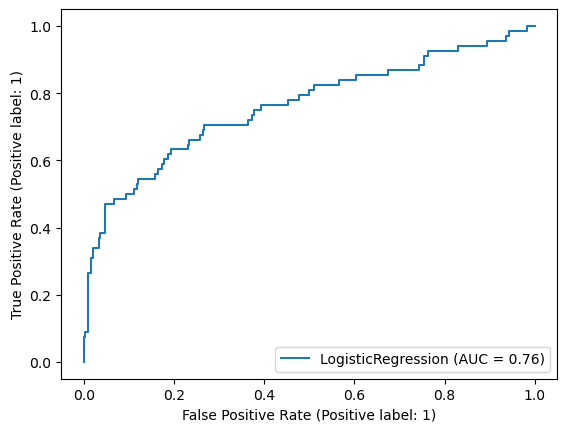

In [112]:
RocCurveDisplay.from_estimator(LR, x_test, y_test)

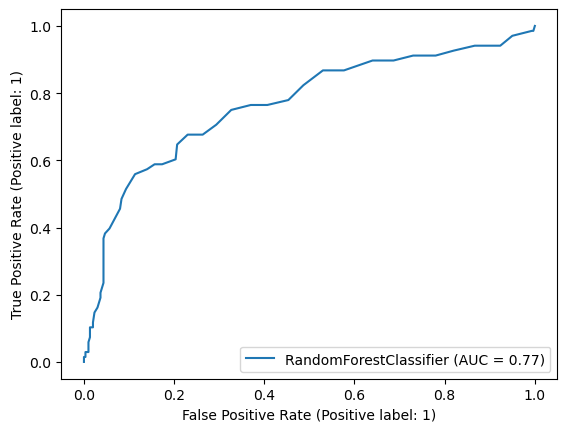

In [113]:
RocCurveDisplay.from_estimator(RAN,x_test,y_test)

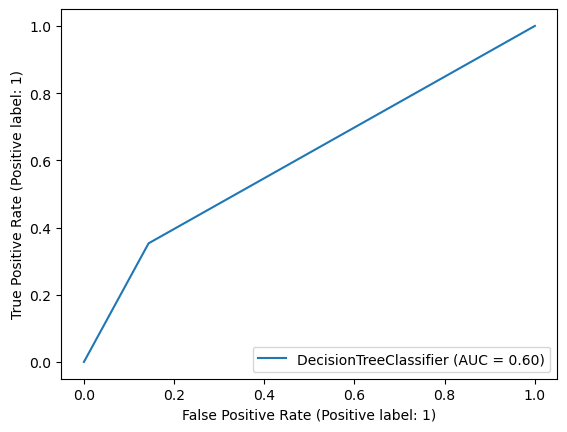

In [114]:
RocCurveDisplay.from_estimator(dt,x_test,y_test)

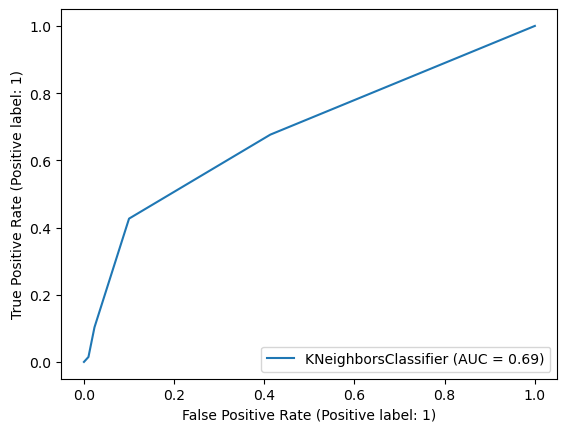

In [115]:
RocCurveDisplay.from_estimator(KNN,x_test,y_test)

In [117]:
import joblib
joblib.dump(mod,"HRAttritionAnalysis.pkl")

['HRAttritionAnalysis.pkl']

In [118]:
mod = joblib.load("HRAttritionAnalysis.pkl")

In [120]:
prediction = mod.predict(x_test)
prediction

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [121]:
results = pd.DataFrame()
results['Predicted'] = prediction
results['Actual'] = y
results

,Predicted,Actual
0,0,1.0
1,0,0.0
2,0,1.0
3,0,0.0
4,1,0.0
5,0,0.0
6,0,0.0
7,0,0.0
8,0,0.0
9,0,0.0


In [126]:
results.to_csv('Results.csv',index = True)